In [ ]:
import pandas as pd

pd.__version__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#%matplotlib inline

In [2]:
from pandas_profiling import ProfileReport

In [3]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [4]:
df = pd.read_csv('Admission_Prediction.csv')

In [5]:
df.head(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   
5           6      330.0        115.0                5.0  4.5  3.0  9.34   
6           7      321.0        109.0                NaN  3.0  4.0  8.20   
7           8      308.0        101.0                2.0  3.0  4.0  7.90   
8           9      302.0        102.0                1.0  2.0  1.5  8.00   
9          10      323.0        108.0                3.0  3.5  3.0  8.60   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
5         1             0.90  
6         1             0.75  
7         0             0.68  
8         0             0.50  
9         0             0.45

In [6]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  485.000000   490.000000         485.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.274704     6.112899           1.146160    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [7]:
pf = ProfileReport(df)

In [8]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.dtypes

Serial No.             int64
GRE Score            float64
TOEFL Score          float64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [10]:
df['University Rating'].dtype

dtype('float64')

In [11]:
df['University Rating'][0]

4.0

In [12]:
len(df['University Rating'])

500

df['University Rating'] = df['University Rating'].astype(int)

df['University Rating'] = df['University Rating'].astype('object')

df['University Rating'].dtype

In [13]:
conda list

# packages in environment at C:\Users\KARISHMA\anaconda3:
Note: you may need to restart the kernel to use updated packages.
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2

In [ ]:
# preprocessing of data
# filling missing values

In [14]:
df['University Rating'].isnull()

decorator                 5.1.1              pyhd3eb1b0_0  
defusedxml                0.7.1              pyhd3eb1b0_0  
diff-match-patch          20200713           pyhd3eb1b0_0  
distributed               2022.2.1           pyhd3eb1b0_0  
dnspython                 2.2.1                    pypi_0    pypi
docutils                  0.17.1           py39haa95532_1  
entrypoints               0.4              py39haa95532_0  
et_xmlfile                1.1.0            py39haa95532_0  
executing                 0.8.3              pyhd3eb1b0_0  
filelock                  3.6.0              pyhd3eb1b0_0  
flake8                    3.9.2              pyhd3eb1b0_0  
flask                     1.1.2              pyhd3eb1b0_0  
flask-cors                3.0.8                    pypi_0    pypi
folium                    0.12.1.post1             pypi_0    pypi
fonttools                 4.25.0             pyhd3eb1b0_0  
freetype                  2.10.4               hd328e21_0  
frozenlist            

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: University Rating, Length: 500, dtype: bool

In [15]:
df['University Rating'].isnull().sum()

15

In [16]:
# filling missing values(university rating 
#column is looking like categorical column that is why we are using mode to fill the missig value)

df['University Rating'].mode()

0    3.0
Name: University Rating, dtype: float64

In [17]:
df['University Rating'].mode()[0]

3.0

In [18]:
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [19]:
df['University Rating'].isnull().sum()

0

In [20]:
df['TOEFL Score'].isnull().sum()

10

In [21]:
df['GRE Score'].isnull().sum()

15

In [22]:
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())

In [23]:
df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())

In [24]:
df['TOEFL Score'].isnull().sum()

0

In [25]:
df['GRE Score'].isnull().sum()

0

In [26]:
df = df.drop(columns = ['Serial No.'])

In [27]:
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0  337.000000        118.0                4.0  4.5  4.5  9.65         1   
1  324.000000        107.0                4.0  4.0  4.5  8.87         1   
2  316.558763        104.0                3.0  3.0  3.5  8.00         1   
3  322.000000        110.0                3.0  3.5  2.5  8.67         1   
4  314.000000        103.0                2.0  2.0  3.0  8.21         0   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72  
3             0.80  
4             0.65

C:\Users\KARISHMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARISHMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\KARISHMA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

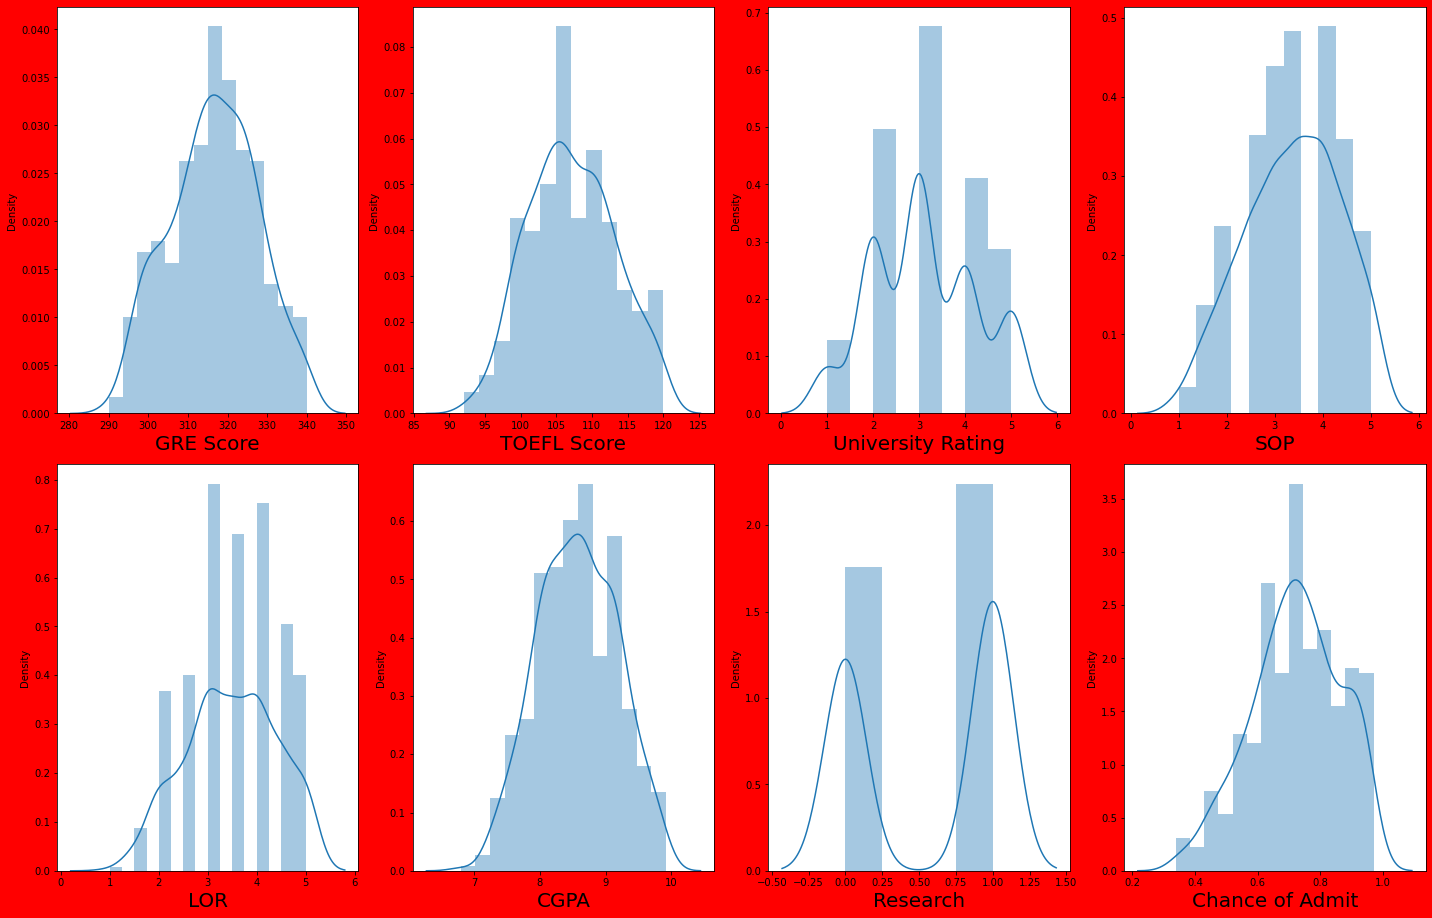

In [28]:
# lets see how data is distributed for every column

plt.figure(figsize=(20,25),facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1

plt.tight_layout()    

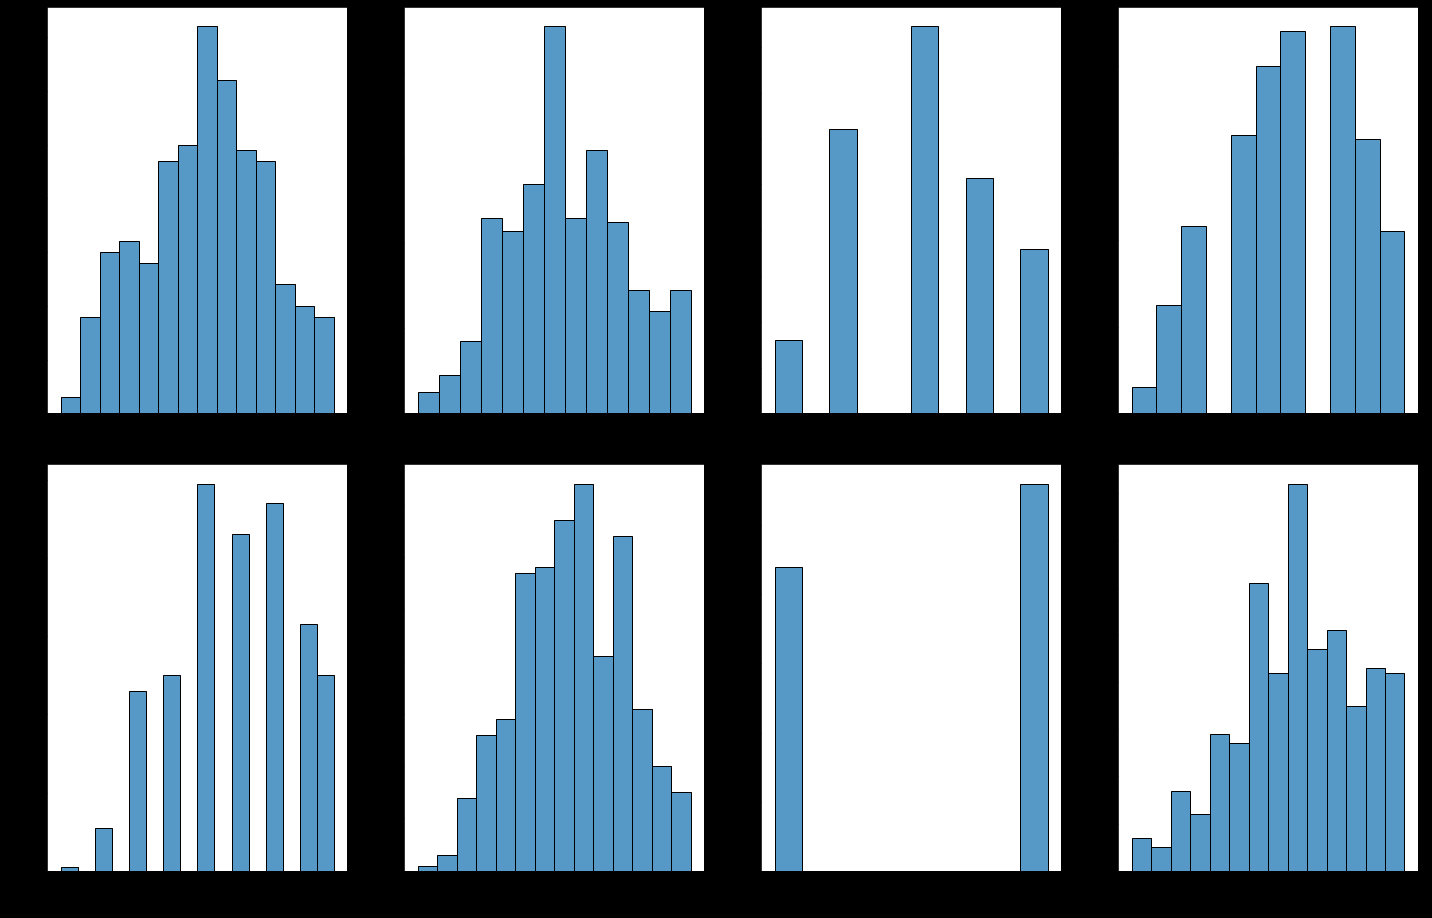

In [29]:
# lets see how data is distributed for every column

plt.figure(figsize=(20,25),facecolor='black')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1

plt.tight_layout()    

In [30]:
y = df['Chance of Admit']
x = df.drop(columns=['Chance of Admit'])

In [31]:
x.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0  337.000000        118.0                4.0  4.5  4.5  9.65         1
1  324.000000        107.0                4.0  4.0  4.5  8.87         1
2  316.558763        104.0                3.0  3.0  3.5  8.00         1
3  322.000000        110.0                3.0  3.5  2.5  8.67         1
4  314.000000        103.0                2.0  2.0  3.0  8.21         0

In [32]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

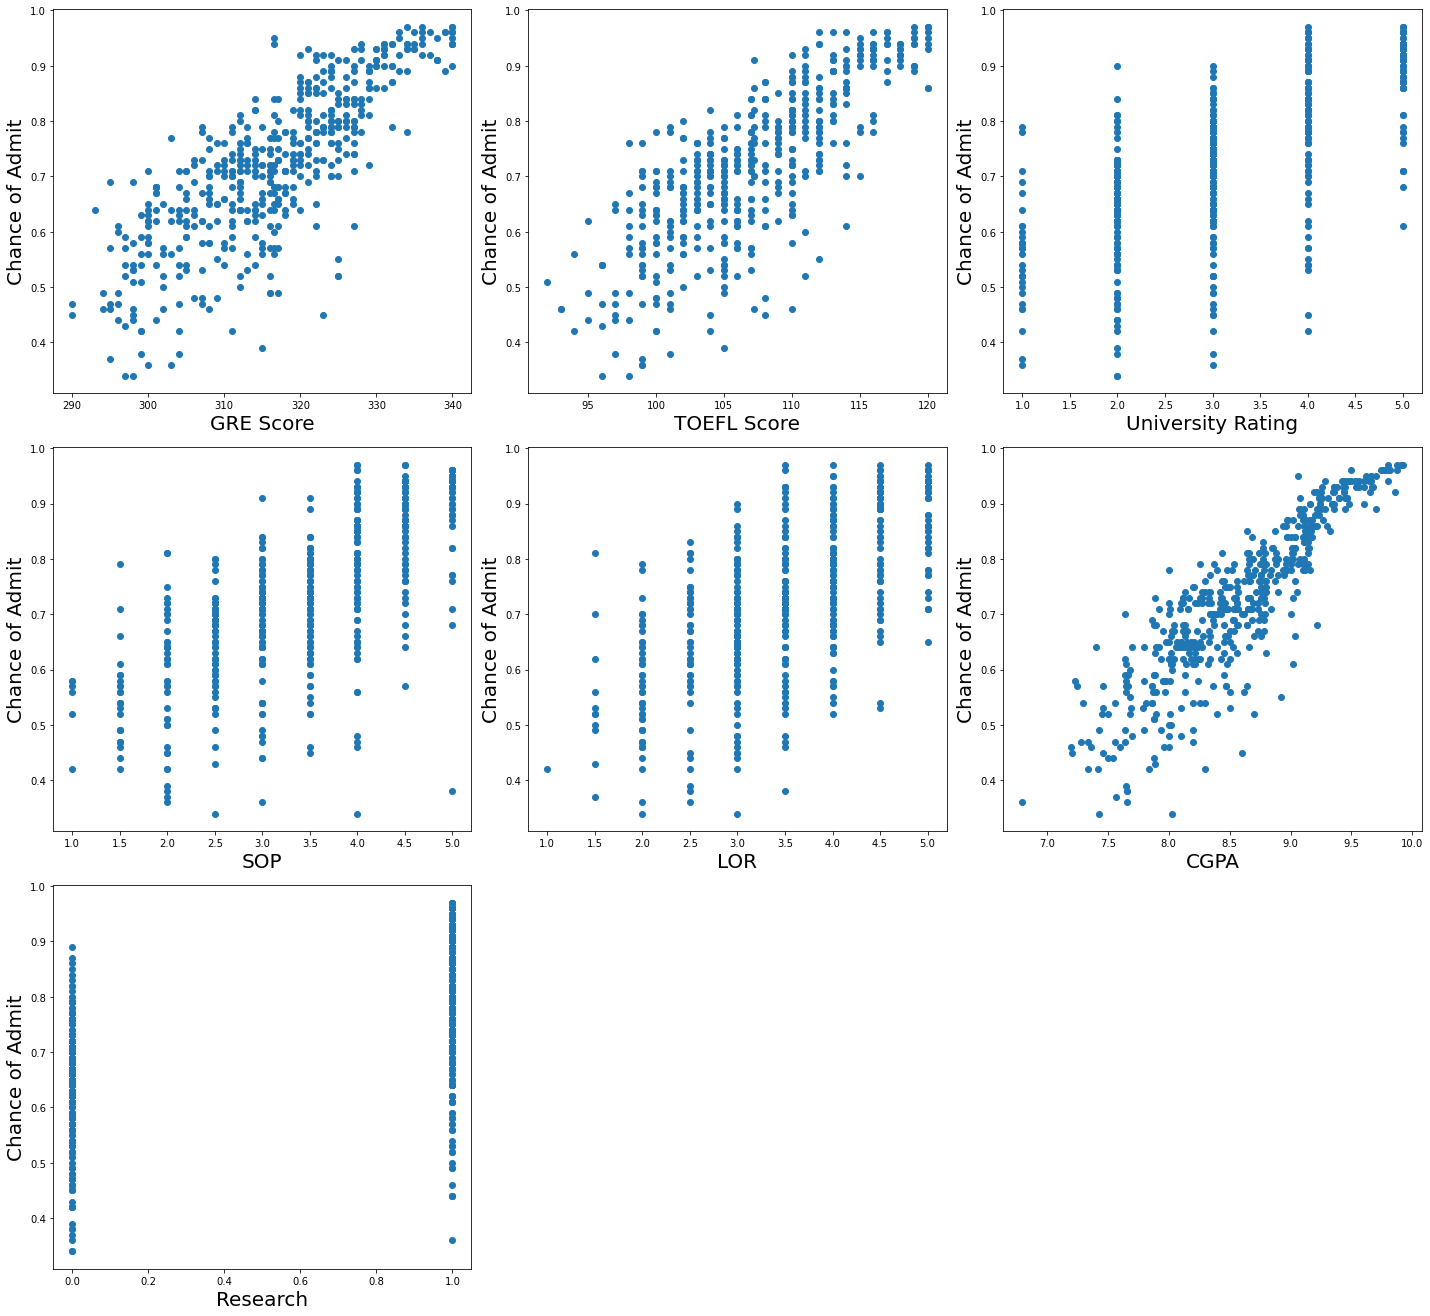

In [33]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit', fontsize=20)
    plotnumber+=1
plt.tight_layout()    

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
x_scaled = scaler.fit_transform(x)

In [37]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [38]:
x.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [39]:
df1 = pd.DataFrame(x_scaled,columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'])

In [40]:
df1.head()

GRE Score  TOEFL Score  University Rating       SOP       LOR      CGPA  \
0  1.842741e+00     1.788542           0.782010  1.137360  1.098944  1.776806   
1  6.708143e-01    -0.031058           0.782010  0.632315  1.098944  0.485859   
2  5.124333e-15    -0.527313          -0.104623 -0.377773  0.017306 -0.954043   
3  4.905178e-01     0.465197          -0.104623  0.127271 -1.064332  0.154847   
4 -2.306679e-01    -0.692731          -0.991255 -1.387862 -0.523513 -0.606480   

   Research  
0  0.886405  
1  0.886405  
2  0.886405  
3  0.886405  
4 -1.128152

In [41]:
pf = ProfileReport(df1)

In [42]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\KARISHMA\anaconda3\lib\site-packages\multimethod\__init__.py:312: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
df1['GRE Score'].mean()

4.384048679639818e-15

In [44]:
df1['GRE Score'].std()

1.0010015025043841

In [ ]:
# to check multicollinearity we need to check vif value

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
variables = x_scaled

In [47]:
variables

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [48]:
variables.shape

(500, 7)

In [49]:
variables.shape[1]

7

In [50]:
range(variables.shape[1])

range(0, 7)

In [51]:
for i in range(variables.shape[1]):
    print(i)

0
1
2
3
4
5
6


In [ ]:
# we create a new data frame which will include all the VIFs
# note that each variable has its own vriance inflation factor as this measure is variable specific(not model specific)
# we don not include categorical values for multicollinearity as they do not provide much information as neumerical once do 

In [52]:
vif = pd.DataFrame()

In [53]:
type(vif)

pandas.core.frame.DataFrame

In [ ]:
# here we make use of the variance_inflation_factor, which will basically output the respective VIFs

In [54]:
variance_inflation_factor(variables,0)

4.152734526510754

In [55]:
variance_inflation_factor(variables,1)

3.7933449809625897

In [56]:
variance_inflation_factor(variables,2)

2.517271723381032

In [57]:
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [58]:
vif

VIF
0  4.152735
1  3.793345
2  2.517272
3  2.776393
4  2.037449
5  4.654369
6  1.459411

In [59]:
# finally, i like to include names so it is easier to explore the result

In [60]:
vif["Features"] = x.columns

In [61]:
vif

VIF           Features
0  4.152735          GRE Score
1  3.793345        TOEFL Score
2  2.517272  University Rating
3  2.776393                SOP
4  2.037449                LOR
5  4.654369               CGPA
6  1.459411           Research

In [ ]:
#here we have the correlation values for all the features.
# as a thumb rule, a VIF vlue greater than 5 means a very severe multicollinearity
#here we dont have any VIF greater than 5, so we are good to go

# great lets go ahead and use linear regression and see how
# good it fits our data.but first lets split our data in train and test.

In [ ]:
# this is called validation because here we are not using blind data for testing we are using only available data for testing

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [63]:
x_train

array([[-1.22229835e+00, -1.51982203e+00, -1.87788687e+00, ...,
        -1.06433187e+00, -1.53331383e+00, -1.12815215e+00],
       [ 5.12433309e-15,  1.95396044e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.85955927e+00,  8.86405260e-01],
       [-5.91260806e-01, -1.96476326e-01,  7.82009548e-01, ...,
        -1.06433187e+00, -3.58221197e-01, -1.12815215e+00],
       ...,
       [-1.13215013e+00, -1.68524024e+00, -9.91254733e-01, ...,
        -1.60515091e+00, -1.54986443e+00, -1.12815215e+00],
       [ 2.02303760e+00,  1.12686938e+00,  1.66864169e+00, ...,
         1.09894429e+00,  1.95886287e+00,  8.86405260e-01],
       [ 4.00369625e-01,  1.12686938e+00,  7.82009548e-01, ...,
         1.63976333e+00,  8.99624440e-01, -1.12815215e+00]])

In [64]:
len(x_train)

375

In [65]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [66]:
regression = LinearRegression()

In [67]:
regression.fit(x_train, y_train)

LinearRegression()

In [78]:
# find out coefficient
regression.coef_

array([0.02337531, 0.01126961, 0.00431843, 0.00142731, 0.01481975,
       0.07883426, 0.00987942])

In [79]:
# find out intercept
regression.intercept_

0.7232045728172708

In [80]:
x_test

array([[-1.94348412e+00, -2.34691310e+00, -1.87788687e+00,
        -1.38786180e+00, -1.60515091e+00, -2.27809085e+00,
        -1.12815215e+00],
       [ 6.70814288e-01,  4.65196526e-01,  7.82009548e-01,
         1.13735981e+00,  5.58125251e-01,  9.49276241e-01,
         8.86405260e-01],
       [-7.71557248e-01, -1.96476326e-01, -1.04622593e-01,
        -3.77773152e-01, -5.23512832e-01, -5.56828403e-01,
        -1.12815215e+00],
       [ 1.03140717e+00,  1.34360100e-01,  7.82009548e-01,
         1.13735981e+00,  5.58125251e-01,  9.98928043e-01,
         8.86405260e-01],
       [ 1.93288938e+00,  2.11937866e+00,  7.82009548e-01,
         1.64240413e+00,  1.63976333e+00,  1.79335687e+00,
         8.86405260e-01],
       [ 3.97767408e-02, -1.18898560e+00, -9.91254733e-01,
        -3.77773152e-01, -1.06433187e+00, -1.06585867e-02,
        -1.12815215e+00],
       [-3.20816143e-01, -8.58149178e-01, -1.04622593e-01,
        -1.38786180e+00, -5.23512832e-01, -5.07176601e-01,
        -1.1281521

In [68]:
# finding out a score(r2 value)
regression.score(x_train,y_train)

0.8415250484247909

In [69]:
# bulk prediction
y_hat = regression.predict(x_test)

In [70]:
y_hat

array([0.42671078, 0.840992  , 0.639163  , 0.84960684, 0.97242831,
       0.67815622, 0.64471497, 0.51718923, 0.65646131, 0.43779919,
       0.82448737, 0.59924484, 0.77090128, 0.70721701, 0.66488888,
       0.66844094, 0.7598087 , 0.66796236, 0.58985033, 0.82882511,
       0.67245483, 0.76580406, 0.82111094, 0.56069037, 0.58862035,
       0.68435618, 0.48566015, 0.78548109, 0.78640408, 0.81979647,
       0.72920656, 0.97403144, 0.94563084, 0.72219204, 0.7781274 ,
       0.65627586, 0.85570211, 0.7325153 , 0.66311202, 0.62174418,
       0.63972461, 0.62800767, 0.69247539, 0.61804461, 0.64191495,
       0.68295594, 0.5976811 , 0.76515832, 0.73758316, 0.60575541,
       0.6690648 , 0.77119619, 0.64562653, 0.92685189, 0.64901754,
       0.80628668, 0.50061588, 0.84504464, 0.7511868 , 0.45917044,
       0.78745912, 0.57289054, 0.75358675, 0.65266467, 0.61517764,
       0.94438015, 0.62395745, 0.67793886, 0.86383045, 0.62828468,
       0.95655226, 0.95065944, 0.83034706, 0.53044513, 0.62686

In [82]:
# single value prediction
# take one value from x_test and give input as predict function 
regression.predict(np.array([[-1.94348412e+00, -2.34691310e+00, -1.87788687e+00,
        -1.38786180e+00, -1.60515091e+00, -2.27809085e+00,
        -1.12815215e+00]]))

array([0.42671078])

In [71]:
y_test

28     0.46
382    0.82
342    0.58
311    0.84
212    0.95
       ... 
142    0.92
446    0.93
411    0.56
174    0.87
220    0.76
Name: Chance of Admit, Length: 125, dtype: float64

In [72]:
len(y_hat)

125

In [73]:
# lets create a function to create adjusted R-squared

def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [74]:
# finding out adjusted r2 value

adj_r2(x_train,y_train)

0.8385023654247188

In [ ]:
# our r2 score is 84.15% and adj_r2 is 83.85% for our training etc.. so looks like we are not
# being penalized by use of any feature
# lets check how well model fits the test data
# now lets check if our model is overfitting our data using regularization

In [75]:
regression.score(x_test,y_test)

0.7534898831471066

In [76]:
adj_r2(x_test,y_test)

0.7387414146174464

In [ ]:
# Lasso-Regression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [93]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
reg.fit(x_train,y_train)

Lasso(alpha=0.1)

In [98]:
print(reg.coef_)

[0.        0.        0.        0.        0.        0.0273093 0.       ]


In [99]:
print(reg.intercept_)

0.720465549509526


In [100]:
reg.predict(x_test)

array([0.65825249, 0.74638962, 0.70525896, 0.74774557, 0.76944087,
       0.72017447, 0.70661491, 0.67859182, 0.70887484, 0.66458028,
       0.74458168, 0.67859182, 0.72966616, 0.71701057, 0.70616293,
       0.71520263, 0.72876219, 0.70977881, 0.69486329, 0.74955352,
       0.70209506, 0.72424234, 0.74412969, 0.69486329, 0.69441131,
       0.71475065, 0.66277234, 0.74548565, 0.72921418, 0.74412969,
       0.72966616, 0.77305675, 0.76492102, 0.72153043, 0.72876219,
       0.70345102, 0.74458168, 0.71249072, 0.71113477, 0.70616293,
       0.70345102, 0.69983513, 0.70977881, 0.69712322, 0.71475065,
       0.69893116, 0.68989146, 0.73057013, 0.73960984, 0.70028712,
       0.70661491, 0.72785822, 0.71339469, 0.7622091 , 0.70435499,
       0.73283006, 0.67181204, 0.7378019 , 0.72740624, 0.66051241,
       0.73599396, 0.68808352, 0.72831021, 0.7007391 , 0.69215138,
       0.76763293, 0.70345102, 0.70887484, 0.7500055 , 0.70797087,
       0.76898888, 0.77034484, 0.74955352, 0.67904381, 0.70616

In [101]:
reg.predict(np.array([[-1.94348412e+00, -2.34691310e+00, -1.87788687e+00,
        -1.38786180e+00, -1.60515091e+00, -2.27809085e+00,
        -1.12815215e+00]]))

array([0.65825249])

In [102]:
reg.predict([[-1.94348412e+00, -2.34691310e+00, -1.87788687e+00,
        -1.38786180e+00, -1.60515091e+00, -2.27809085e+00,
        -1.12815215e+00]])

array([0.65825249])

In [ ]:
# Lasso-Regression with CV

# lasso regularization
# lassocv will return best alpha and coefficients after
# performing 10 cross validations

In [104]:
lasscv =  LassoCV(alphas = None,cv = 5,normalize = True)

In [105]:
lasscv.fit(x_train,y_train)

C:\Users\KARISHMA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, normalize=True)

In [106]:
# best alpha number
alpha = lasscv.alpha_
alpha

5.302290459369658e-05

In [109]:
alphas = np.random.uniform(low =0, high = 10, size=50)

In [110]:
alphas

array([0.49075456, 0.99878797, 0.90485811, 1.93834531, 6.95913057,
       1.2655172 , 6.66333368, 2.05526396, 1.91452628, 2.68931557,
       8.18006578, 9.69646738, 7.08982248, 7.44542147, 9.74734078,
       6.70955055, 8.13502546, 9.33258979, 7.06026253, 5.29149062,
       2.3411731 , 3.48988819, 3.93336604, 5.60290218, 9.08443472,
       9.70332129, 0.63867352, 7.96781453, 6.685939  , 6.24288839,
       3.9671641 , 4.96132378, 5.91658252, 4.96074338, 4.54309132,
       9.13622681, 4.64012278, 6.03949086, 0.13144204, 2.00314397,
       8.69734897, 6.57406166, 1.48981112, 4.95735502, 3.04997022,
       0.15087282, 1.50618836, 4.19145997, 0.47033679, 0.95016476])

In [111]:
lasscv2 = LassoCV(alphas=alphas, cv = 5, normalize = True)

In [112]:
lasscv2.fit(x_train,y_train)

C:\Users\KARISHMA\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(alphas=array([0.49075456, 0.99878797, 0.90485811, 1.93834531, 6.95913057,
       1.2655172 , 6.66333368, 2.05526396, 1.91452628, 2.68931557,
       8.18006578, 9.69646738, 7.08982248, 7.44542147, 9.74734078,
       6.70955055, 8.13502546, 9.33258979, 7.06026253, 5.29149062,
       2.3411731 , 3.48988819, 3.93336604, 5.60290218, 9.08443472,
       9.70332129, 0.63867352, 7.96781453, 6.685939  , 6.24288839,
       3.9671641 , 4.96132378, 5.91658252, 4.96074338, 4.54309132,
       9.13622681, 4.64012278, 6.03949086, 0.13144204, 2.00314397,
       8.69734897, 6.57406166, 1.48981112, 4.95735502, 3.04997022,
       0.15087282, 1.50618836, 4.19145997, 0.47033679, 0.95016476]),
        cv=5, normalize=True)

In [113]:
lasscv2.alpha_

9.74734078247424

In [ ]:
# now that we have best parameter, lets use lasso regression and see how well
# our data has fitted before

In [96]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=3.0341655445178153e-05)

In [97]:
lasso_reg.score(x_test, y_test)

0.7534654960492284

In [90]:
# saving a model

import pickle

In [91]:
#saving the model to the local file system
filename = "LR_GRE_end_to_end_filalized_model.pickle"
pickle.dump(regression,open(filename,'wb'))

In [92]:
# Loading a model

# prediction using the saved model
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))

C:\Users\KARISHMA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
